Columns in customer_features: Index(['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate',
       'Quantity', 'TotalValue', 'Price_x', 'ProductName', 'Category',
       'Price_y', 'CustomerName', 'Region', 'SignupDate'],
      dtype='object')
'Price' column not found. Using the available columns for aggregation.
Davies-Bouldin Index: 0.8479679380736725


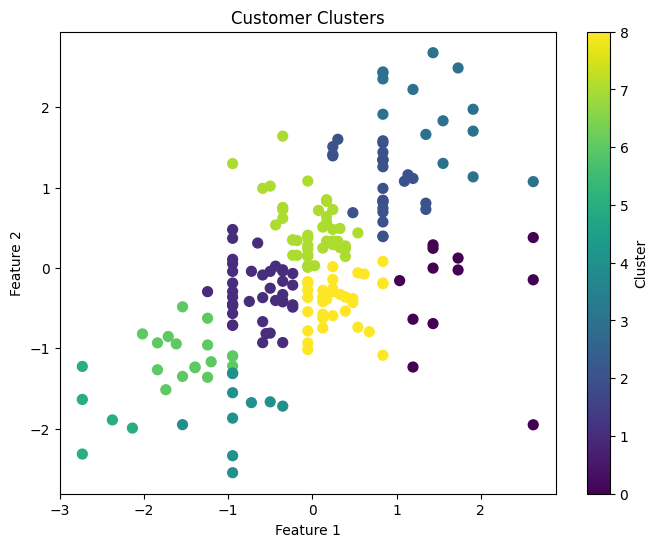

''

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import davies_bouldin_score
from fpdf import FPDF

customers_url = "https://drive.google.com/uc?id=1bu_--mo79VdUG9oin4ybfFGRUSXAe-WE"
products_url = "https://drive.google.com/uc?id=1IKuDizVapw-hyktwfpoAoaGtHtTNHfd0"
transactions_url = "https://drive.google.com/uc?id=1saEqdbBB-vuk2hxoAf4TzDEsykdKlzbF"

customers = pd.read_csv(customers_url)
products = pd.read_csv(products_url)
transactions = pd.read_csv(transactions_url)

transaction_details = transactions.merge(products, on='ProductID', how='left')             # Combining Transactions and Products
customer_features = transaction_details.merge(customers, on='CustomerID', how='left')
print("Columns in customer_features:", customer_features.columns)                          # checking the columns

if 'Price' not in customer_features.columns:
    print("'Price' column not found. Using the available columns for aggregation.")        # Checking for Price Column
    features = ['Quantity', 'TotalValue']
else:
    features = ['Quantity', 'TotalValue', 'Price']

customer_features_agg = customer_features.groupby('CustomerID')[features].mean().reset_index()
scaler = StandardScaler()
scaled_features = scaler.fit_transform(customer_features_agg[features])

clustering_features = customer_features_agg.copy()
n_clusters = 9
                                                                  # taken cluster as 9
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clustering_features['Cluster'] = kmeans.fit_predict(scaled_features)
db_index = davies_bouldin_score(scaled_features, clustering_features['Cluster'])
print(f"Davies-Bouldin Index: {db_index}")                                              # DB index calculation

plt.figure(figsize=(8, 6))
plt.scatter(scaled_features[:, 0], scaled_features[:, 1], c=clustering_features['Cluster'], cmap='viridis', s=50)
plt.title('Customer Clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster')
plt.savefig("customer_clusters.png")
plt.show()

plt.close()
class PDF(FPDF):
    def header(self):
        self.set_font('Arial', 'B', 12)
        self.cell(0, 10, 'Customer Clustering Report', border=0, ln=1, align='C')

    def footer(self):
        self.set_y(-15)
        self.set_font('Arial', 'I', 8)
        self.cell(0, 10, f'Page {self.page_no()}', align='C')

pdf = PDF()
pdf.add_page()

pdf.set_font('Arial', size=12)                                         # clustering report details
pdf.cell(0, 10, f'Number of Clusters: {n_clusters}', ln=1)
pdf.cell(0, 10, f'Davies-Bouldin Index: {db_index:.4f}', ln=1)
pdf.cell(0, 10, 'Clustering metrics and visualizations:', ln=1)

pdf.image("customer_clusters.png", x=10, w=190)
pdf.cell(0, 10, 'Clustering Results:', ln=1)
pdf.set_font('Arial', size=10)
for index, row in clustering_features.iterrows():
    pdf.cell(0, 10, f'CustomerID: {row["CustomerID"]}, Cluster: {row["Cluster"]}', ln=1)

pdf.output("Pranav_Pakalapati_Clustering.pdf")



In [31]:
from google.colab import files
files.download("Pranav_Pakalapati_Clustering.pdf")



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>